# Rozdział 13. Statystyka

## Importy

In [105]:
from scipy import stats

In [106]:
from scipy import optimize

In [107]:
import numpy as np
import random

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

In [109]:
import seaborn as sns

In [110]:
sns.set(style="whitegrid")

## Statystyki opisowe

In [111]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

In [112]:
np.mean(x)

3.1

In [113]:
np.median(x)

3.0

In [114]:
x.min(), x.max()

(0.9, 6.7)

In [115]:
x.var()

3.0700000000000007

In [116]:
x.std()

1.7521415467935233

In [117]:
x.var(ddof=1)

3.5085714285714293

In [118]:
x.std(ddof=1)

1.8731181032095732

## Liczby losowe

In [119]:
random.seed(123456789)

In [120]:
random.random()

0.6414006161858726

In [121]:
random.randint(0, 10)  # Przedział [0,10] jest domknięty

8

In [122]:
np.random.seed(123456789)

In [123]:
np.random.rand()

0.532833024789759

In [124]:
np.random.randn()

0.8768342101492541

In [125]:
np.random.rand(5)

array([0.71356403, 0.25699895, 0.75269361, 0.88387918, 0.15489908])

In [126]:
np.random.randn(2, 4)

array([[ 3.13325952,  1.15727052,  1.37591514,  0.94302846],
       [ 0.8478706 ,  0.52969142, -0.56940469,  0.83180456]])

In [127]:
np.random.randint(10, size=10)

array([0, 3, 8, 3, 9, 0, 6, 9, 2, 7])

In [128]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[12, 18, 18, 17, 14, 12, 14, 10, 16, 19],
       [15, 13, 15, 18, 11, 17, 17, 10, 13, 17]])

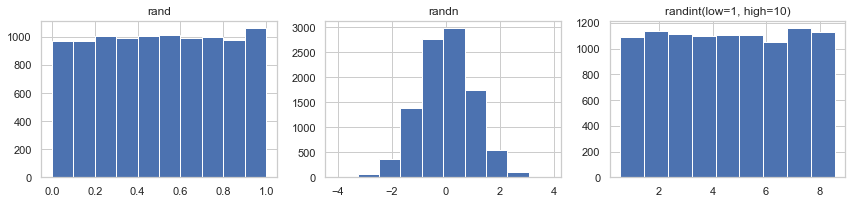

In [129]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()
fig.savefig("ch13-random-hist.pdf")

In [130]:
#random.sample(range(10), 5)

In [131]:
np.random.choice(10, 5, replace=False)

array([9, 0, 5, 8, 1])

In [132]:
np.random.seed(123456789)

In [133]:
np.random.rand()

0.532833024789759

In [134]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [135]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [136]:
prng = np.random.RandomState(123456789)

In [137]:
prng.rand(2, 4)

array([[0.53283302, 0.5341366 , 0.50955304, 0.71356403],
       [0.25699895, 0.75269361, 0.88387918, 0.15489908]])

In [138]:
prng.chisquare(1, size=(2, 2))

array([[1.00418922e+00, 1.26859720e+00],
       [2.02731988e+00, 2.52605129e-05]])

In [139]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [140]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [141]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [142]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

# Rozkłady prawdopodobieństwa i zmienne losowe

In [143]:
np.random.seed(123456789)

In [144]:
X = stats.norm(1, 0.5)

In [145]:
X.mean()

1.0

In [146]:
X.median()

1.0

In [147]:
X.std()

0.5

In [148]:
X.var()

0.25

In [149]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [150]:
X.stats()

(array(1.), array(0.25))

In [151]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [152]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [153]:
X.rvs(10)

array([2.106451  , 2.0641989 , 1.9208557 , 1.04119124, 1.42948184,
       0.58699179, 1.57863526, 1.68795757, 1.47151423, 1.4239353 ])

In [154]:
stats.norm(1, 0.5).stats()

(array(1.), array(0.25))

In [155]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [156]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [157]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [158]:
def plot_rv_distribution(X, axes=None):
    """Tworzy wykresy funkcji rozkładu prawdopodobieństwa, dystrybuanty i jej
    odwrotności oraz funkcji przeżycia dla zadanej zmiennej losowej."""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="Funkcja rozkładu prawdopodobieństwa")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="Funkcja masy prawdopodobieństwa")
    axes[1].plot(x999, X.cdf(x999), label="Dystrybuanta rozkładu")
    axes[1].plot(x999, X.sf(x999), label="Funkcja przeżycia")
    axes[2].plot(x999, X.ppf(x999), label="Odwrotność dystrybuanty")
    
    for ax in axes:
        ax.legend()
    
    return axes

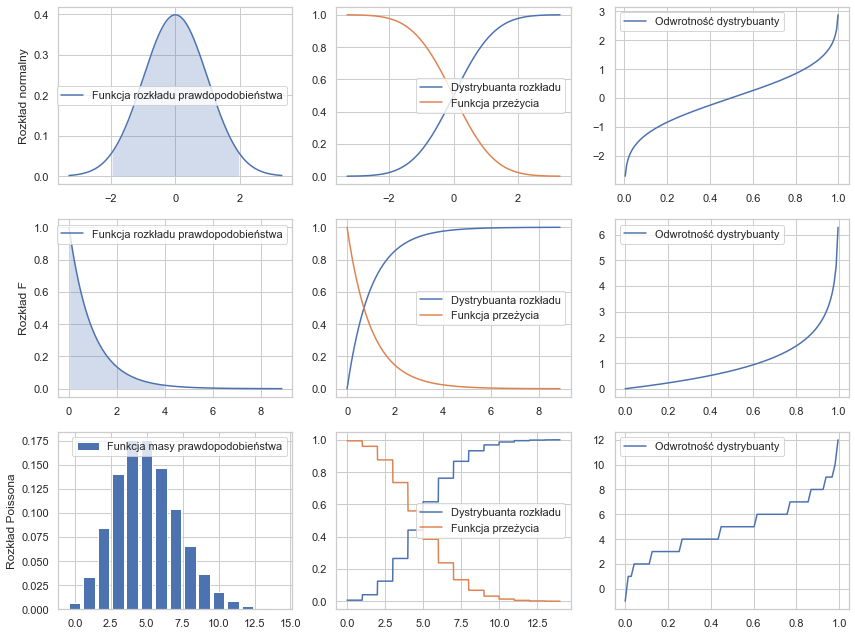

In [159]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Rozkład normalny")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("Rozkład F")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Rozkład Poissona")

fig.tight_layout()
fig.savefig("ch13-distributions.pdf")

In [160]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Tworzy wykres funkcji rozkładu prawdopodobieństwa i histogram 
    dla próbek ciągłej zmiennej losowej."""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="Funkcja rozkładu prawdopodobieństwa", lw=3)    
    ax.hist(X_samples, label="Próbki", density=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

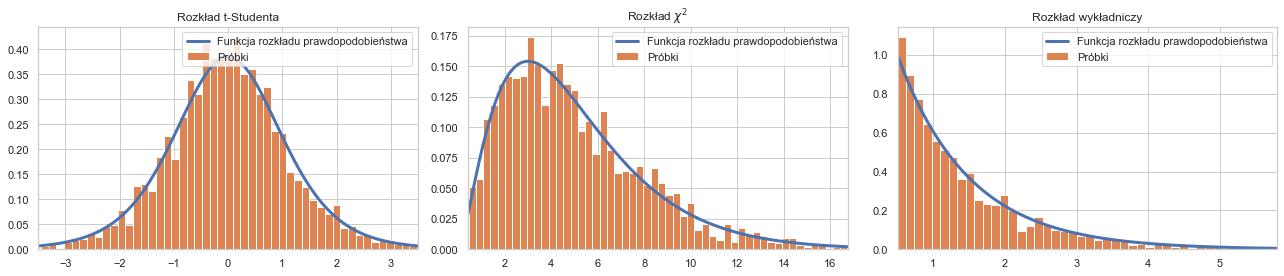

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
N = 2000
# Rozkład t-Studenta
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Rozkład t-Studenta", ax=axes[0])
# Rozkład chi kwadrat
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"Rozkład $\chi^2$", ax=axes[1])
# Rozkład wykładniczy
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "Rozkład wykładniczy", ax=axes[2])
fig.tight_layout()
fig.savefig("ch13-dist-sample.pdf")

In [162]:
X = stats.chi2(df=5)

In [163]:
X_samples = X.rvs(500)

In [164]:
df, loc, scale = stats.chi2.fit(X_samples)

In [165]:
df, loc, scale

(4.728645123391404, 0.03257330219133387, 1.0734482977974253)

In [166]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

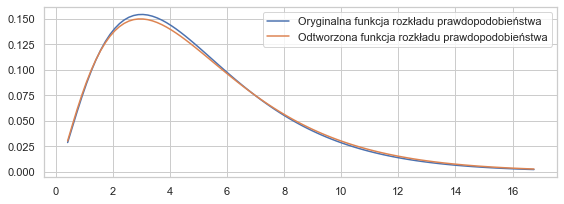

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

ax.plot(x, X.pdf(x), label="Oryginalna funkcja rozkładu prawdopodobieństwa")
ax.plot(x, Y.pdf(x), label="Odtworzona funkcja rozkładu prawdopodobieństwa")
ax.legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

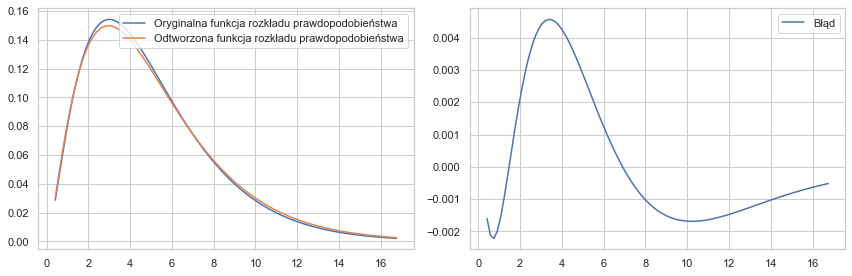

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="Oryginalna funkcja rozkładu prawdopodobieństwa")
axes[0].plot(x, Y.pdf(x), label="Odtworzona funkcja rozkładu prawdopodobieństwa")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="Błąd")
axes[1].legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

# Testowanie hipotez

In [169]:
np.random.seed(123456789)

In [170]:
mu, sigma = 1.0, 0.5

In [171]:
X = stats.norm(mu-0.2, sigma)

In [172]:
n = 100

In [173]:
X_samples = X.rvs(n)

In [174]:
z = (X_samples.mean() - mu)/(sigma/np.sqrt(n))

In [175]:
z

-2.8338979550098298

In [176]:
t = (X_samples.mean() - mu)/(X_samples.std(ddof=1)/np.sqrt(n))

In [177]:
t

-2.9680338545657845

In [178]:
stats.norm().ppf(0.025)

-1.9599639845400545

In [179]:
2 * stats.norm().cdf(-abs(z))

0.004598401329075357

In [180]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.003758647967422721

In [181]:
t, p = stats.ttest_1samp(X_samples, mu)

In [182]:
t

-2.968033854565784

In [183]:
p

0.003758647967422721

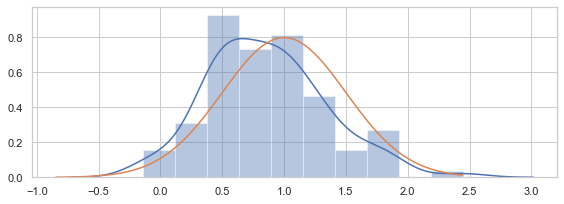

In [184]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()
fig.savefig("ch13-hypothesis-test-dist-sample-mean.pdf")

In [185]:
n = 50

In [186]:
mu1, mu2 = np.random.rand(2)

In [187]:
X1 = stats.norm(mu1, sigma)

In [188]:
X1_sample = X1.rvs(n)

In [189]:
X2 = stats.norm(mu2, sigma)

In [190]:
X2_sample = X2.rvs(n)

In [191]:
t, p = stats.ttest_ind(X1_sample, X2_sample)

In [192]:
t

-1.4283175246005888

In [193]:
p

0.15637981059673237

In [194]:
mu1, mu2

(0.24764580637159606, 0.42145435527527897)

<AxesSubplot:>

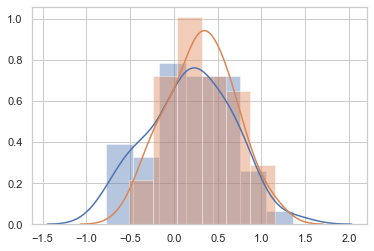

In [195]:
sns.distplot(X1_sample)
sns.distplot(X2_sample)

# Metody nieparametryczne

In [196]:
np.random.seed(0)

In [197]:
X = stats.chi2(df=5)

In [198]:
X_samples = X.rvs(100)

In [199]:
kde = stats.kde.gaussian_kde(X_samples)

In [200]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

In [201]:
x = np.linspace(0, 20, 100)

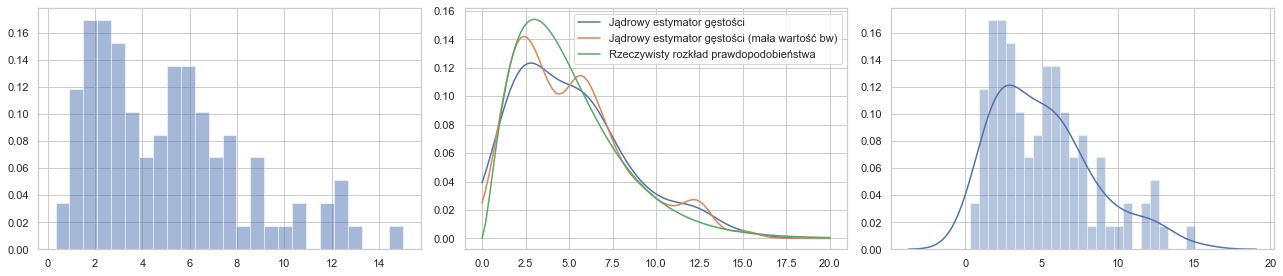

In [202]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].hist(X_samples, density=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="Jądrowy estymator gęstości")
axes[1].plot(x, kde_low_bw(x), label="Jądrowy estymator gęstości (mała wartość bw)")
axes[1].plot(x, X.pdf(x), label="Rzeczywisty rozkład prawdopodobieństwa")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()
fig.savefig("ch13-hist-kde.pdf")

In [203]:
kde.resample(10)

array([[ 1.10979087,  0.4379679 , 14.20879078,  5.94683846,  1.78490438,
         5.58416739,  4.18349885,  2.78527976,  0.68112826,  7.7643985 ]])

In [204]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)

In [205]:
kde_cdf = np.vectorize(_kde_cdf)

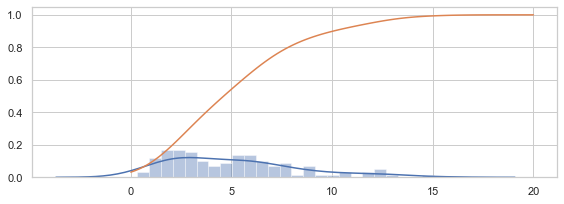

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.distplot(X_samples, bins=25, ax=ax)
x = np.linspace(0, 20, 100)
ax.plot(x, kde_cdf(x))

fig.tight_layout()

In [207]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]

In [208]:
kde_ppf = np.vectorize(_kde_ppf)

In [209]:
kde_ppf([0.05, 0.95])

array([ 0.39074674, 11.94993578])

In [210]:
X.ppf([0.05, 0.95])

array([ 1.14547623, 11.07049769])